## Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Loading Iris Dataset

In [20]:
df = pd.read_csv(r"E:\Practicing AI\Projects\IRIS\Iris.csv")

## Data Summary

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Cleaning

In [22]:
df.drop("Id",axis=1,inplace=True)

## Sample Data

In [23]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,6.5,3.0,5.8,2.2,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
24,4.8,3.4,1.9,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica


## First 10 Rows

In [24]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Summary after cleaning the data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Descriptive Statistics

In [26]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Unique Values in Species

In [27]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Species Distribution

In [28]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Missing Values

In [29]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Label Encoding and Target Variable

In [30]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
y = df['Species']

## First 10 Rows after Encodeing Species

In [31]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Unique Values in Species after encoding

In [32]:
df['Species'].unique()

array([0, 1, 2])

# Data Visualization

<Axes: >

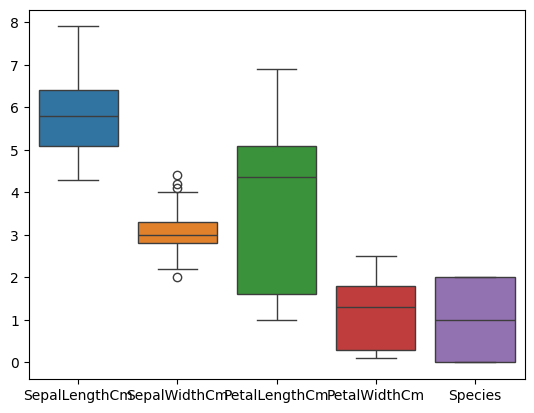

In [33]:
sns.boxplot(df)

<Axes: >

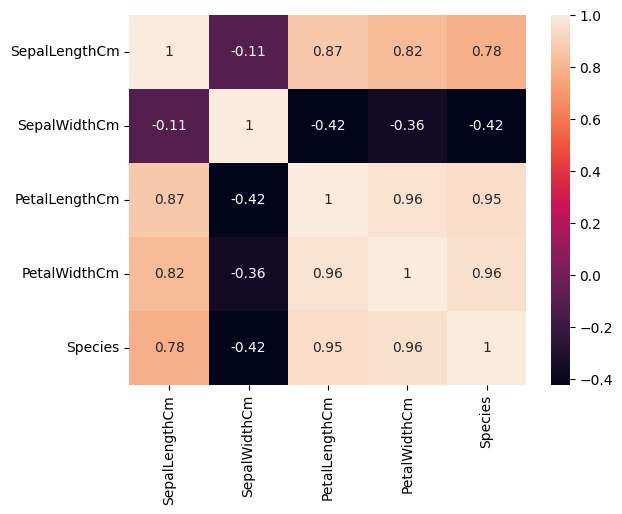

In [34]:
sns.heatmap(df.corr(),annot=True)

## Feature Selection

In [35]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

x = df[features].values

In [36]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Spliting the data (`train_test_split`)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Model Training and Prediction

In [38]:
model1 = RandomForestClassifier(max_depth=4,random_state=42,n_estimators=100)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [39]:
y_pred1 = model1.predict(x_test)

In [40]:
model2 = KNeighborsClassifier(n_neighbors=6,algorithm='auto')
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [41]:
y_pred2 = model2.predict(x_test)

In [42]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred3 = model3.predict(x_test)

## Model Evaluation

In [44]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)

## Confusion Matrix

In [45]:
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)

## Precision Score

In [46]:
pr1 = precision_score(y_test,y_pred1,average='macro')
pr2 = precision_score(y_test,y_pred2,average='macro')
pr3 = precision_score(y_test,y_pred3,average='macro')

## Recall Score

In [47]:
re1 = recall_score(y_test,y_pred1,average='macro')
re2 = recall_score(y_test,y_pred2,average='macro')
re3 = recall_score(y_test,y_pred3,average='macro')

## Model Evaluation Results

In [48]:
print("Accuracy of Random Forest Classifier:",acc1)
print("Accuracy of KNN Classifier:",acc2)
print("Accuracy of Decision Tree Classifier:",acc3)

Accuracy of Random Forest Classifier: 1.0
Accuracy of KNN Classifier: 1.0
Accuracy of Decision Tree Classifier: 1.0


In [49]:
print("Confusion Matrix of Random Forest Classifier:\n",cm1)
print("\n")
print("Confusion Matrix of KNN Classifier:\n",cm2)
print("\n")
print("Confusion Matrix of Decision Tree Classifier:\n",cm3)

Confusion Matrix of Random Forest Classifier:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Confusion Matrix of KNN Classifier:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Confusion Matrix of Decision Tree Classifier:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [50]:
print("Precision of Random Forest Classifier:",pr1)
print("Precision of KNN Classifier:",pr2)
print("Precision of Decision Tree Classifier:",pr3)

Precision of Random Forest Classifier: 1.0
Precision of KNN Classifier: 1.0
Precision of Decision Tree Classifier: 1.0


In [51]:
print("Recall of Random Forest Classifier:",re1)
print("Recall of KNN Classifier:",re2)
print("Recall of Decision Tree Classifier:",re3)

Recall of Random Forest Classifier: 1.0
Recall of KNN Classifier: 1.0
Recall of Decision Tree Classifier: 1.0


## Cross Validation

In [52]:
scores1 = cross_val_score(model1,x,y,cv=5)
scores2 = cross_val_score(model2,x,y,cv=5)
scores3 = cross_val_score(model3,x,y,cv=5)

In [53]:
print("Cross Validation Score of Random Forest Classifier:",scores1.mean())
print("Cross Validation Score of KNN Classifier:",scores2.mean())
print("Cross Validation Score of Decision Tree Classifier:",scores3.mean())

Cross Validation Score of Random Forest Classifier: 0.9666666666666668
Cross Validation Score of KNN Classifier: 0.9800000000000001
Cross Validation Score of Decision Tree Classifier: 0.9666666666666668


## Visualizing Confusion Matrices

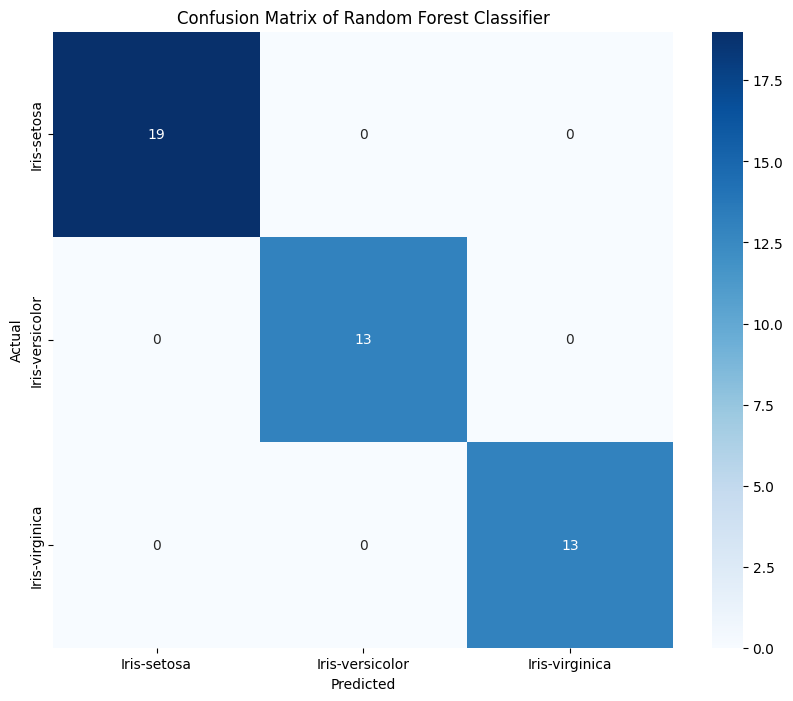

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

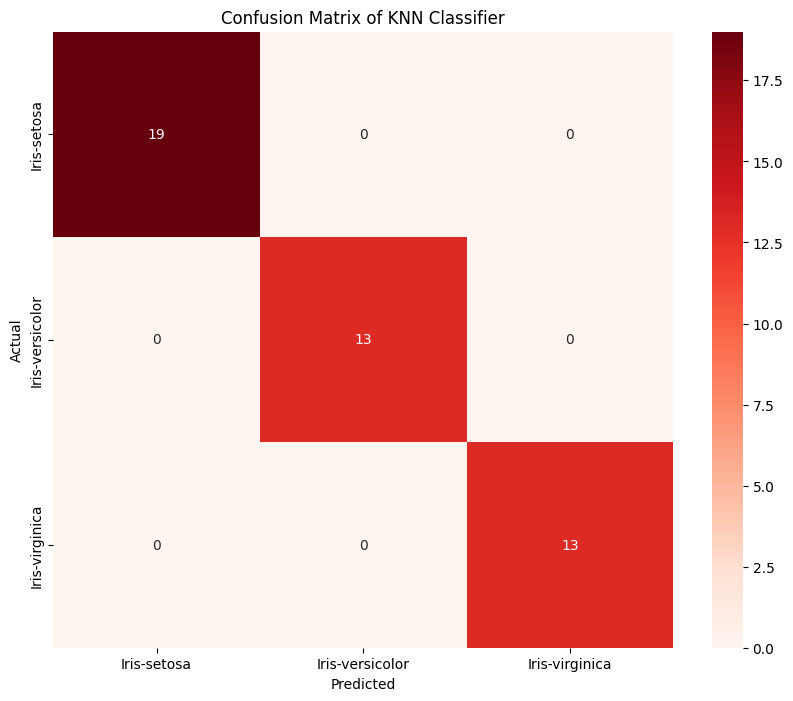

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(cm2,annot=True,fmt='d',cmap='Reds',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix of KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

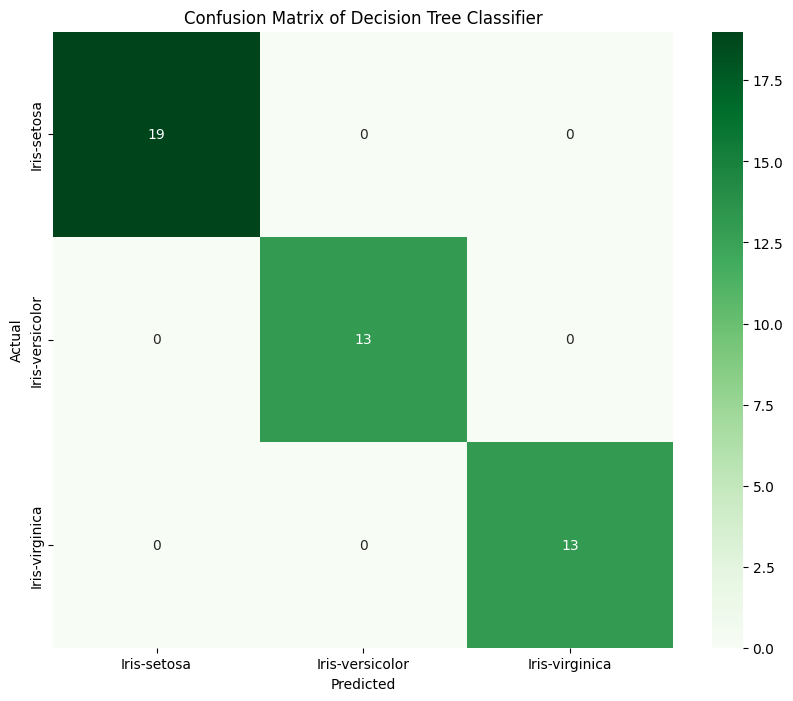

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(cm3,annot=True,fmt='d',cmap='Greens',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature Importance Analysis

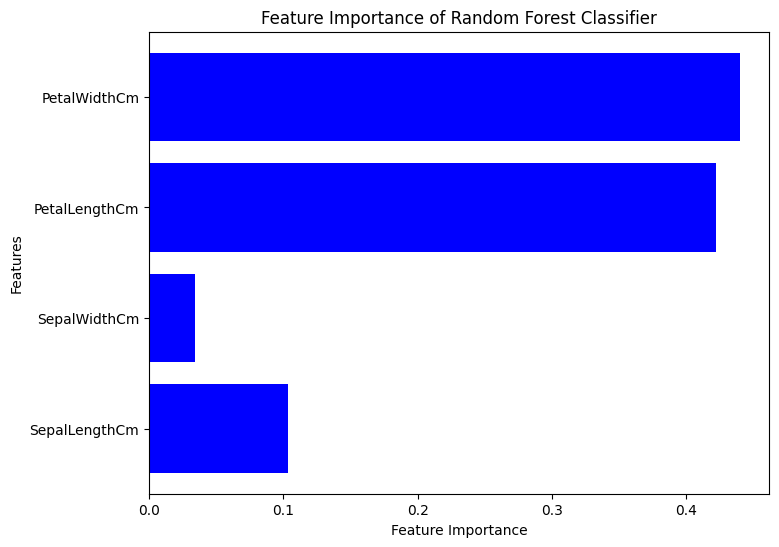

In [57]:
featureImportance1 = model1.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(features,featureImportance1,color='blue')
plt.title("Feature Importance of Random Forest Classifier")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

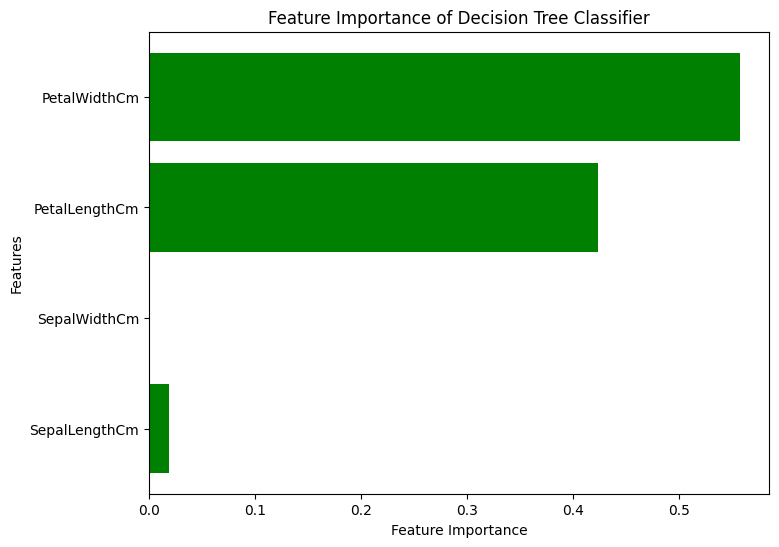

In [58]:
featureImportance3 = model3.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(features,featureImportance3,color='green')
plt.title("Feature Importance of Decision Tree Classifier")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()